<a href="https://colab.research.google.com/github/starkjones/US-Housing-Forecasting-w-FRED-/blob/main/US_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
# Mount google drive:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
# Import libraries:

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

In [48]:
# Load training data:

data = '/content/drive/MyDrive/SI/US Housing Forcasting Data 220907.xlsx'

df = pd.read_excel(data)

df.head()

,DATE,MSPNHSUS,UNDCONTSA,PERMIT,HOUST,MORTGAGE30US,MORTGAGE15US,WGS10YR,WGS5YR,M2SL,...,GASREGW,POP,CLF16OV,UNRATE,JTSJOL,JTSLDL,ALTSALES,BUSLOANS,TOTALSL,RRSFS
0,2022-08-01,NaN,NaN,NaN,NaN,5.22,4.56,2.86,2.99,NaN,...,3.975,333188.359,164746,3.7,NaN,NaN,13.181,NaN,NaN,NaN
1,2022-07-01,439400.0,1678.0,1685.0,1446.0,5.41,4.61,2.93,3.00,21709.2,...,4.559,333084.961,163960,3.5,11239.0,1398.0,13.332,2702.7815,NaN,231250.0
2,2022-06-01,414900.0,1680.0,1696.0,1599.0,5.52,4.65,3.13,3.17,21667.3,...,4.929,332971.981,164023,3.6,11040.0,1400.0,13.015,2661.1148,4627.43653,231128.0
3,2022-05-01,441100.0,1677.0,1695.0,1562.0,5.23,4.44,2.90,2.88,21684.4,...,4.444,332884.622,164376,3.6,11303.0,1416.0,12.766,2595.6669,4587.28211,232307.0
4,2022-04-01,458200.0,1668.0,1823.0,1805.0,4.98,4.22,2.69,2.73,21655.5,...,4.109,332842.301,164046,3.6,11681.0,1312.0,14.514,2560.4200,4563.48947,233739.0


In [49]:
# Data Frame size / shape:

df.shape

(404, 24)

In [50]:
# Check for duplicated rows:

df.duplicated().sum()

0

In [51]:
# Remove duplicates:

df.drop_duplicates()

,DATE,MSPNHSUS,UNDCONTSA,PERMIT,HOUST,MORTGAGE30US,MORTGAGE15US,WGS10YR,WGS5YR,M2SL,...,GASREGW,POP,CLF16OV,UNRATE,JTSJOL,JTSLDL,ALTSALES,BUSLOANS,TOTALSL,RRSFS
0,2022-08-01,NaN,NaN,NaN,NaN,5.22,4.56,2.86,2.99,NaN,...,3.975,333188.359,164746,3.7,NaN,NaN,13.181,NaN,NaN,NaN
1,2022-07-01,439400.0,1678.0,1685.0,1446.0,5.41,4.61,2.93,3.00,21709.2,...,4.559,333084.961,163960,3.5,11239.0,1398.0,13.332,2702.7815,NaN,231250.0
2,2022-06-01,414900.0,1680.0,1696.0,1599.0,5.52,4.65,3.13,3.17,21667.3,...,4.929,332971.981,164023,3.6,11040.0,1400.0,13.015,2661.1148,4627.43653,231128.0
3,2022-05-01,441100.0,1677.0,1695.0,1562.0,5.23,4.44,2.90,2.88,21684.4,...,4.444,332884.622,164376,3.6,11303.0,1416.0,12.766,2595.6669,4587.28211,232307.0
4,2022-04-01,458200.0,1668.0,1823.0,1805.0,4.98,4.22,2.69,2.73,21655.5,...,4.109,332842.301,164046,3.6,11681.0,1312.0,14.514,2560.4200,4563.48947,233739.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,1989-05-01,119000.0,913.0,1381.0,1331.0,10.77,NaN,8.89,8.94,3011.6,...,NaN,246906.000,123474,5.2,NaN,NaN,14.942,624.3084,769.27570,118548.0
400,1989-04-01,116700.0,922.0,1376.0,1339.0,11.05,NaN,9.18,9.30,3006.0,...,NaN,246721.000,123565,5.2,NaN,NaN,15.698,619.0564,764.71245,118156.0
401,1989-03-01,123000.0,940.0,1214.0,1422.0,11.03,NaN,9.36,9.52,2999.7,...,NaN,246530.000,123227,5.0,NaN,NaN,14.362,616.5005,760.01834,117700.0
402,1989-02-01,118000.0,947.0,1383.0,1425.0,10.65,NaN,9.14,9.24,2992.2,...,NaN,246378.000,123135,5.2,NaN,NaN,14.668,617.1110,752.89300,118480.0


In [52]:
# Check column tpyes and non-null entires:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          404 non-null    datetime64[ns]
 1   MSPNHSUS      403 non-null    float64       
 2   UNDCONTSA     403 non-null    float64       
 3   PERMIT        403 non-null    float64       
 4   HOUST         403 non-null    float64       
 5   MORTGAGE30US  404 non-null    float64       
 6   MORTGAGE15US  372 non-null    float64       
 7   WGS10YR       404 non-null    float64       
 8   WGS5YR        404 non-null    float64       
 9   M2SL          403 non-null    float64       
 10  FF            404 non-null    float64       
 11  SPCS20RSA     270 non-null    float64       
 12  CPIUFDSL      403 non-null    float64       
 13  DCOILWTICO    404 non-null    float64       
 14  GASREGW       384 non-null    float64       
 15  POP           404 non-null    float64   

In [53]:
 # Check for missing values:

 df.isna().sum()

DATE              0
MSPNHSUS          1
UNDCONTSA         1
PERMIT            1
HOUST             1
MORTGAGE30US      0
MORTGAGE15US     32
WGS10YR           0
WGS5YR            0
M2SL              1
FF                0
SPCS20RSA       134
CPIUFDSL          1
DCOILWTICO        0
GASREGW          20
POP               0
CLF16OV           0
UNRATE            0
JTSJOL          144
JTSLDL          144
ALTSALES          0
BUSLOANS          1
TOTALSL           2
RRSFS             1
dtype: int64

In [54]:
# Imputation

columns = df.columns

for column in columns:
  if df[column].isna().sum() >= 1:
    df[column].fillna(method='ffill', inplace = True)
  else: 
    'ignore'


In [56]:
# Imputation:

cols = df.columns

for column in cols:
  if df[column].isna().sum() >= 1:
    df[column].fillna(method='bfill', inplace = True)
  else: 
    'ignore'


In [57]:
# Set date as index:

df.set_index('DATE', inplace =True)

df.head()

,MSPNHSUS,UNDCONTSA,PERMIT,HOUST,MORTGAGE30US,MORTGAGE15US,WGS10YR,WGS5YR,M2SL,FF,...,GASREGW,POP,CLF16OV,UNRATE,JTSJOL,JTSLDL,ALTSALES,BUSLOANS,TOTALSL,RRSFS
DATE,,,,,,,,,,,,,,,,,,,,,
2022-08-01,439400.0,1678.0,1685.0,1446.0,5.22,4.56,2.86,2.99,21709.2,2.33,...,3.975,333188.359,164746,3.7,11239.0,1398.0,13.181,2702.7815,4627.43653,231250.0
2022-07-01,439400.0,1678.0,1685.0,1446.0,5.41,4.61,2.93,3.00,21709.2,1.58,...,4.559,333084.961,163960,3.5,11239.0,1398.0,13.332,2702.7815,4627.43653,231250.0
2022-06-01,414900.0,1680.0,1696.0,1599.0,5.52,4.65,3.13,3.17,21667.3,1.13,...,4.929,332971.981,164023,3.6,11040.0,1400.0,13.015,2661.1148,4627.43653,231128.0
2022-05-01,441100.0,1677.0,1695.0,1562.0,5.23,4.44,2.90,2.88,21684.4,0.71,...,4.444,332884.622,164376,3.6,11303.0,1416.0,12.766,2595.6669,4587.28211,232307.0
2022-04-01,458200.0,1668.0,1823.0,1805.0,4.98,4.22,2.69,2.73,21655.5,0.33,...,4.109,332842.301,164046,3.6,11681.0,1312.0,14.514,2560.4200,4563.48947,233739.0


In [60]:
 # Final check for missing values:

 df.isna().sum()

MSPNHSUS        0
UNDCONTSA       0
PERMIT          0
HOUST           0
MORTGAGE30US    0
MORTGAGE15US    0
WGS10YR         0
WGS5YR          0
M2SL            0
FF              0
SPCS20RSA       0
CPIUFDSL        0
DCOILWTICO      0
GASREGW         0
POP             0
CLF16OV         0
UNRATE          0
JTSJOL          0
JTSLDL          0
ALTSALES        0
BUSLOANS        0
TOTALSL         0
RRSFS           0
dtype: int64

In [81]:
# Renaming of columns:

df.columns = ['MED_SALES_PRICE_NEW_HOMES', 'PRIVATE_HOUSING_CONSTRUCTION', 'PERMITS_NEW_PRIVATE_HOMES', 'NEW_PRIVATE_HOME_STARTS', '30YEAR_MORTAGE', '15YEAR_MORTGAGE',
              '10YR_TREASURY', '5YR_TREASURY', 'M2_MONEY_SUPPLY', 'FED_FUNDRATE', 'S&P_CASE-SCHILLER_20CITY_HOME', 'CPI_FOOD_CITY_AVG', 'CRUDE_OIL_PRICES', 'US_GAS_PRICES',
              'POPULATION', 'CIVILIAN_LABOR', 'UNEMPLOYMENT_RATE', 'JOB_OPENINGS', 'LAYOFFS_DISCHARGES', 'AUTOS_LIGHT_TRUCKS', 'COM_INDUSTRIAL_LOANS', 'TOTAL_CON_CREDIT', 'RETIAL_FOOD_SERVICES_SALES']

In [82]:
# Check column datatypes:

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 404 entries, 2022-08-01 to 1989-01-01
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MED_SALES_PRICE_NEW_HOMES      404 non-null    float64
 1   PRIVATE_HOUSING_CONSTRUCTION   404 non-null    float64
 2   PERMITS_NEW_PRIVATE_HOMES      404 non-null    float64
 3   NEW_PRIVATE_HOME_STARTS        404 non-null    float64
 4   30YEAR_MORTAGE                 404 non-null    float64
 5   15YEAR_MORTGAGE                404 non-null    float64
 6   10YR_TREASURY                  404 non-null    float64
 7   5YR_TREASURY                   404 non-null    float64
 8   M2_MONEY_SUPPLY                404 non-null    float64
 9   FED_FUNDRATE                   404 non-null    float64
 10  S&P_CASE-SCHILLER_20CITY_HOME  404 non-null    float64
 11  CPI_FOOD_CITY_AVG              404 non-null    float64
 12  CRUDE_OIL_PRICES               

In [83]:
# Check for numeric annomalies: 

df.describe().round(1)

,MED_SALES_PRICE_NEW_HOMES,PRIVATE_HOUSING_CONSTRUCTION,PERMITS_NEW_PRIVATE_HOMES,NEW_PRIVATE_HOME_STARTS,30YEAR_MORTAGE,15YEAR_MORTGAGE,10YR_TREASURY,5YR_TREASURY,M2_MONEY_SUPPLY,FED_FUNDRATE,...,US_GAS_PRICES,POPULATION,CIVILIAN_LABOR,UNEMPLOYMENT_RATE,JOB_OPENINGS,LAYOFFS_DISCHARGES,AUTOS_LIGHT_TRUCKS,COM_INDUSTRIAL_LOANS,TOTAL_CON_CREDIT,RETIAL_FOOD_SERVICES_SALES
count,404.0,404.0,404.0,404.0,404.0,404.0,404.0,404.0,404.0,404.0,...,404.0,404.0,404.0,404.0,404.0,404.0,404.0,404.0,404.0,404.0
mean,219493.1,930.0,1344.0,1321.7,6.1,5.5,4.4,3.9,8160.4,2.9,...,2.1,294774.2,146699.5,5.8,5051.6,1969.2,15.2,1293.6,2312.3,165143.1
std,80875.9,274.0,404.1,389.7,2.0,2.0,2.1,2.3,4894.3,2.6,...,0.9,26145.6,12221.7,1.7,1657.9,685.5,2.1,621.2,1133.2,28375.5
min,113000.0,414.0,513.0,478.0,2.7,2.2,0.6,0.3,2991.7,0.0,...,0.9,246224.0,123135.0,3.5,2232.0,1262.0,8.6,583.7,749.0,117700.0
25%,145000.0,742.2,1072.0,1082.0,4.2,3.4,2.5,1.8,3901.8,0.2,...,1.2,272552.0,136188.0,4.6,4032.2,1821.0,14.1,812.3,1281.8,141434.2
50%,218400.0,949.5,1348.5,1338.0,6.1,5.5,4.3,3.6,6646.8,2.2,...,2.0,297089.5,150015.5,5.4,5088.0,2003.5,15.7,1084.6,2280.3,165781.5
75%,277650.0,1121.0,1649.5,1577.5,7.6,7.1,6.0,5.8,11214.4,5.2,...,2.8,317881.5,155717.5,6.7,5088.0,2018.0,16.8,1638.4,3151.3,180814.5
max,458200.0,1680.0,2263.0,2273.0,11.0,8.8,9.4,9.5,21739.8,9.8,...,4.9,333188.4,164746.0,14.7,11855.0,13026.0,21.7,3025.2,4627.4,236100.0


In [84]:
# Import ibraries for Visual Analysis:

import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
# Instantiate simlple correlation map

correlation = df.corr().round(2)

# Correlation map without duplicates:

upper_correlation = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(bool))

c_list = upper_correlation.unstack().dropna().sort_values(ascending = False)

# List of the features with the strongest relationships

final_c = c_list.transpose()

final_c

TOTAL_CON_CREDIT   CPI_FOOD_CITY_AVG    0.99
15YEAR_MORTGAGE    30YEAR_MORTAGE       0.99
CIVILIAN_LABOR     POPULATION           0.99
10YR_TREASURY      30YEAR_MORTAGE       0.99
5YR_TREASURY       10YR_TREASURY        0.99
                                        ... 
CPI_FOOD_CITY_AVG  10YR_TREASURY       -0.93
                   15YEAR_MORTGAGE     -0.93
POPULATION         15YEAR_MORTGAGE     -0.94
                   30YEAR_MORTAGE      -0.95
                   10YR_TREASURY       -0.95
Length: 253, dtype: float64

In [86]:
index = final_c.index
value = final_c.values

index

MultiIndex([( 'TOTAL_CON_CREDIT',         'CPI_FOOD_CITY_AVG'),
            (  '15YEAR_MORTGAGE',            '30YEAR_MORTAGE'),
            (   'CIVILIAN_LABOR',                'POPULATION'),
            (    '10YR_TREASURY',            '30YEAR_MORTAGE'),
            (     '5YR_TREASURY',             '10YR_TREASURY'),
            ( 'TOTAL_CON_CREDIT',                'POPULATION'),
            (    '10YR_TREASURY',           '15YEAR_MORTGAGE'),
            (       'POPULATION',         'CPI_FOOD_CITY_AVG'),
            ( 'TOTAL_CON_CREDIT', 'MED_SALES_PRICE_NEW_HOMES'),
            (     '5YR_TREASURY',            '30YEAR_MORTAGE'),
            ...
            ( 'TOTAL_CON_CREDIT',           '15YEAR_MORTGAGE'),
            (       'POPULATION',              '5YR_TREASURY'),
            ('CPI_FOOD_CITY_AVG',            '30YEAR_MORTAGE'),
            (   'CIVILIAN_LABOR',            '30YEAR_MORTAGE'),
            (   'CIVILIAN_LABOR',             '10YR_TREASURY'),
            ('CPI_FOOD_C

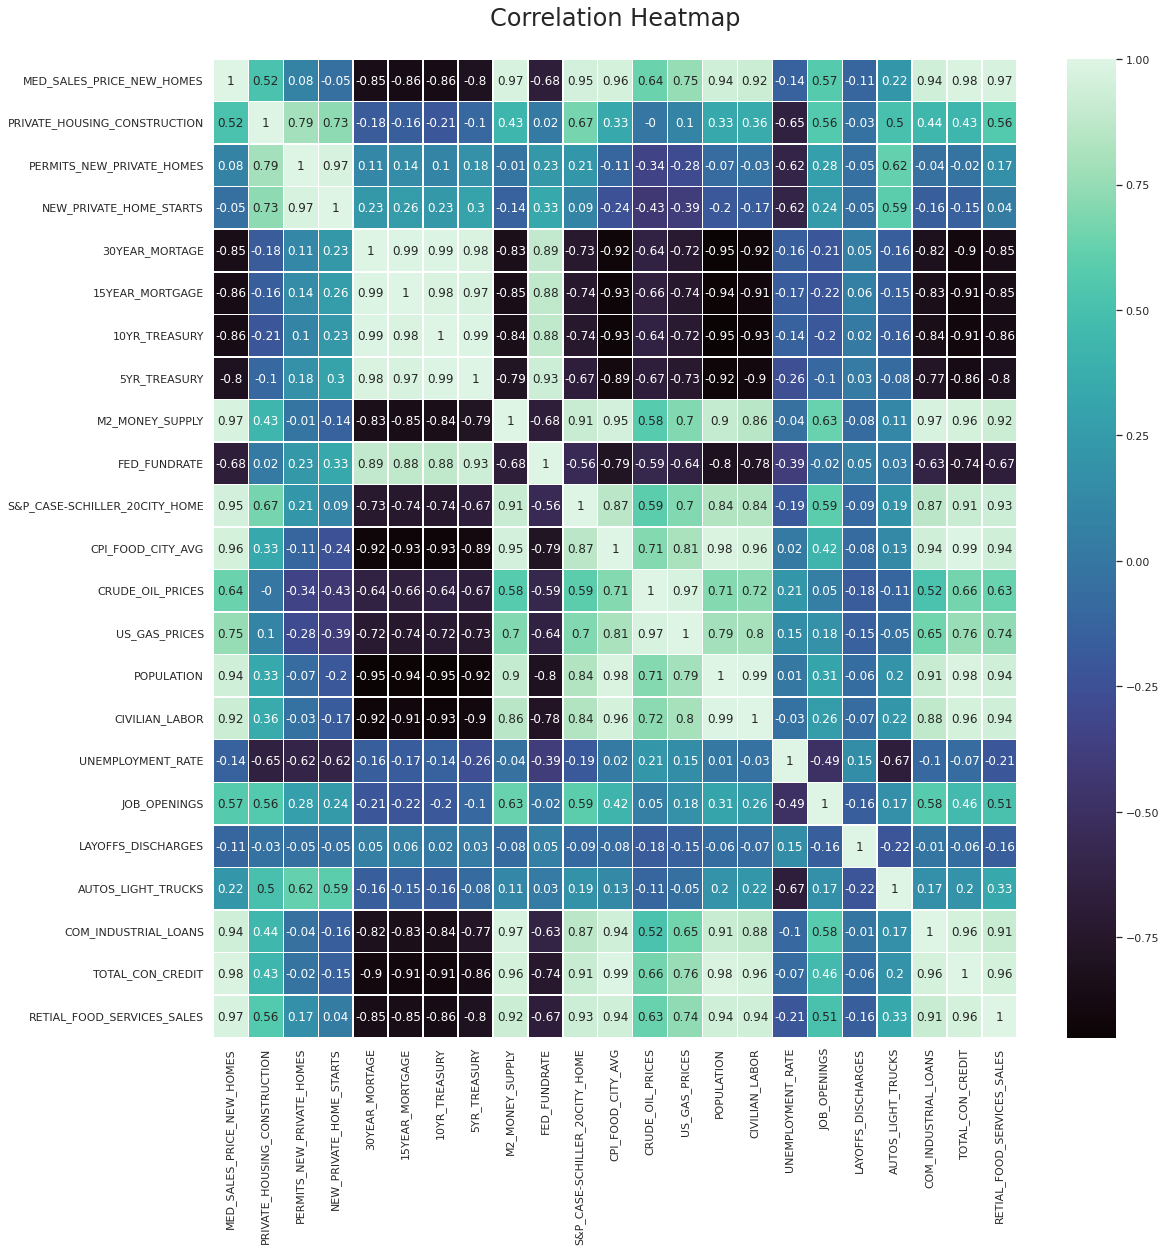

In [111]:
# Correlation heatmap soto identify correlated features:

sns.set_theme()

fig, hm = plt.subplots(nrows=1, ncols =1, figsize=(18,18));
hm = sns.heatmap(correlation, cmap= 'mako', annot=True, linewidths=.5);
hm.set_title('Correlation Heatmap\n', fontsize= 24);

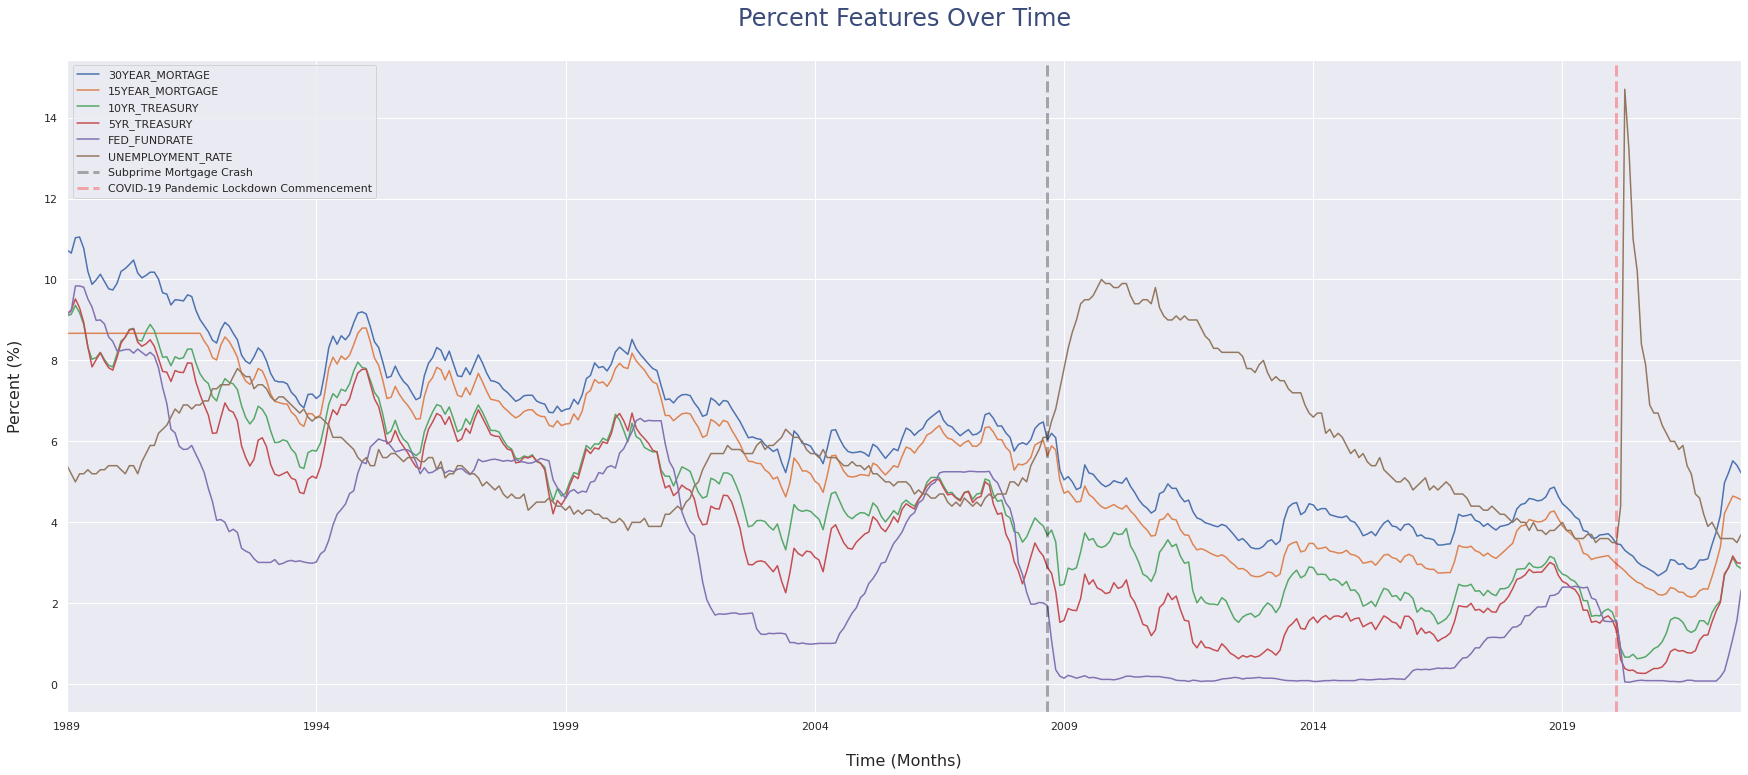

In [106]:
sns.set_theme(style="darkgrid")

percents = df[['30YEAR_MORTAGE', '15YEAR_MORTGAGE', '10YR_TREASURY','5YR_TREASURY', 'FED_FUNDRATE', 'UNEMPLOYMENT_RATE']]

# fig, axes = plt.subplots(nrows=1, ncols =1, figsize=(30,12));
percents.plot(figsize =(30,12))

plt.axvline('9-1-2008', ls='--', color='black', alpha = 0.3, lw=3, label ="Subprime Mortgage Crash");
plt.axvline('2-1-2020', ls='--', color='Red', alpha = 0.3, lw=3, label ="COVID-19 Pandemic Lockdown Commencement");
plt.title('Percent Features Over Time\n', color= '#081d58', alpha= .8, fontsize =24);
plt.xlabel('\nTime (Months)', fontsize = 16);
plt.ylabel('Percent (%)\n', fontsize = 16);
plt.grid('both')
plt.legend();

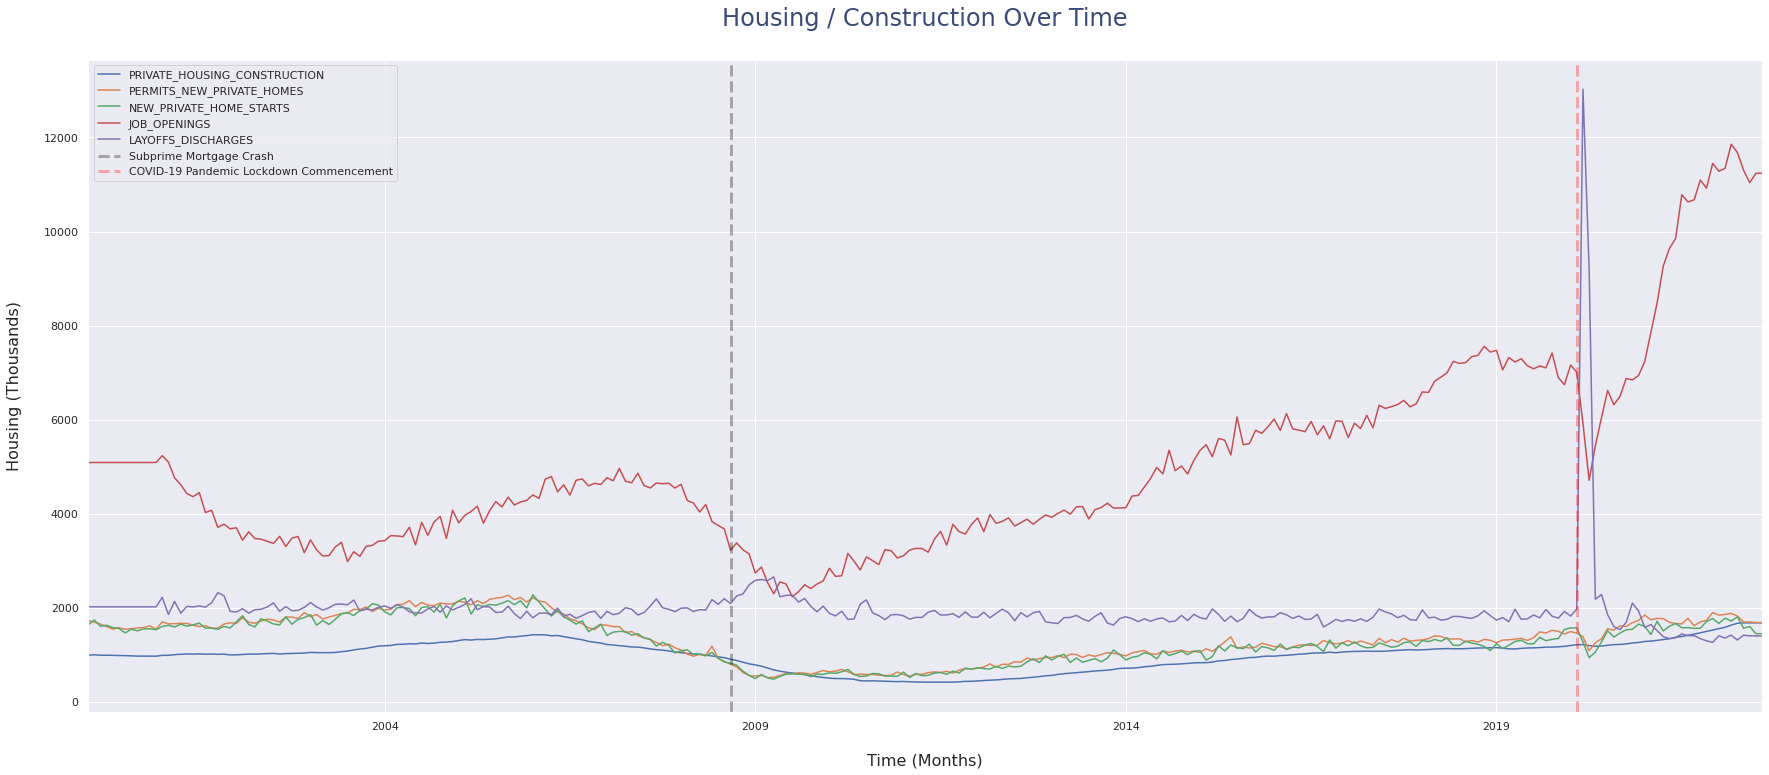

In [121]:
sns.set_theme(style="darkgrid")

housing = df[['PRIVATE_HOUSING_CONSTRUCTION', 'PERMITS_NEW_PRIVATE_HOMES', 'NEW_PRIVATE_HOME_STARTS', 'JOB_OPENINGS', 'LAYOFFS_DISCHARGES']]

# fig, axes = plt.subplots(nrows=1, ncols =1, figsize=(30,12));
housing.plot(figsize =(30,12))

plt.axvline('9-1-2008', ls='--', color='black', alpha = 0.3, lw=3, label ="Subprime Mortgage Crash");
plt.axvline('2-1-2020', ls='--', color='Red', alpha = 0.3, lw=3, label ="COVID-19 Pandemic Lockdown Commencement");
plt.title('Housing / Construction Over Time\n', color= '#081d58', alpha= .8, fontsize =24);
plt.xlabel('\nTime (Months)', fontsize = 16);
plt.ylabel('Housing (Thousands)\n', fontsize = 16);
plt.xlim('1-1-2000', '8-1-2022')
plt.grid('both')
plt.legend();

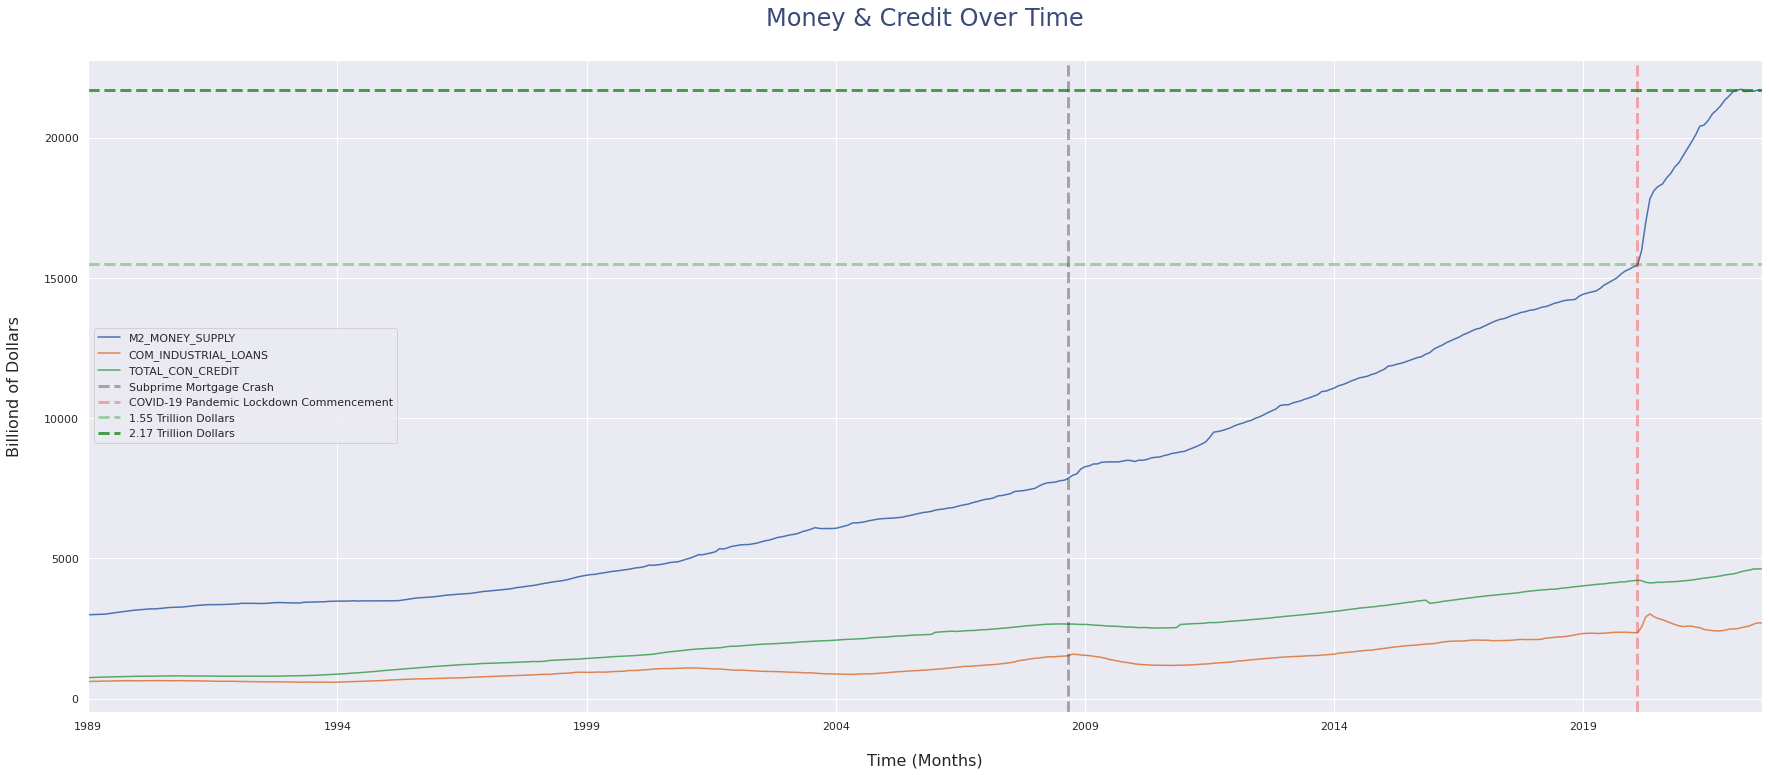

In [144]:
sns.set_theme(style="darkgrid")

money = df[['M2_MONEY_SUPPLY', 'COM_INDUSTRIAL_LOANS', 'TOTAL_CON_CREDIT']]

# fig, axes = plt.subplots(nrows=1, ncols =1, figsize=(30,12));
money.plot(figsize =(30,12))

plt.axvline('9-1-2008', ls='--', color='black', alpha = 0.3, lw=3, label ="Subprime Mortgage Crash");
plt.axvline('2-1-2020', ls='--', color='Red', alpha = 0.3, lw=3, label ="COVID-19 Pandemic Lockdown Commencement");

plt.axhline(y =15500, ls='--', color='green', alpha = 0.3, lw=3, label ="1.55 Trillion Dollars");
plt.axhline(y =21700, ls='--', color='green', alpha = 0.7, lw=3, label ="2.17 Trillion Dollars");

plt.title('Money & Credit Over Time\n', color= '#081d58', alpha= .8, fontsize =24);
plt.xlabel('\nTime (Months)', fontsize = 16);
plt.ylabel('Billiond of Dollars\n', fontsize = 16);
# plt.xlim('1-1-2000', '8-1-2022')
plt.grid('both')
plt.legend();